<a href="https://colab.research.google.com/github/Nazwa-Aulia/Case-Study-03-Data-Mining-Group-G/blob/main/Case_Study_3_Data_Mining_Group_G.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case Study – 03: Supervised Models**

**Kelompok G**

| NIM | Nama |
| -------- | -------- |
|11220940000010   | Siti Magfiroh |
|11220940000026   | Nazwa Aulia |
|11220940000030 | Adinda Nabila Fitri Heryanto |
|11220940000038   | Kiara Zerlin Windriyani   |
|11220940000048   | Reyhan Maulana Aryaduta |

# **Data Understanding**

Berikut adalah deskripsi lengkap dari variabel yang terdapat dalam data tersebut:



* **building_id** - Foreign key for the building metadata.
* **meter_reading** - The target variable. Energy consumption in kWh (or equivalent). Note that this is real data with measurement error, which we expect will impose a baseline level of modeling error. UPDATE: as discussed here, the site 0 electric meter readings are in kBTU.
* **primary_use** - Indicator of the primary category of activities for the building based on EnergyStar property type definitions
* **square_feet** - Gross floor area of the building
* **year_built** - Year building was opened
* **floor_count** - Number of floors of the building
* **air_temperature** - Degrees Celsius
* **cloud_coverage** - Portion of the sky covered in clouds, in oktas
* **dew_temperature** - Degrees Celsius
* **precip_depth_1_hr** - Millimeters
* **sea_level_pressure** - Millibar/hectopascals
* **wind_direction** - Compass direction (0-360)
* **wind_speed** - Meters per second item



# **Load Data**

In [88]:
import pandas as pd

file_ = 'data/Ashrae_Energy_Mean.csv'
try: #Loading Locally
    df = pd.read_csv(file_)
except Exception as err_:
    print(err_, " Trying to load data from GitHub.")
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/Ashrae_Energy_Mean.csv
    df = pd.read_csv(file_)

print(df.shape)

(1413, 12)


# **Preprocessing Data**

## Preview data

In [89]:
df

,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,2008.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,2004.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,1991.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,2002.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,1579.174237,Education,116607,1975.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
...,...,...,...,...,...,...,...,...,...,...,...,...
1408,7.484137,Entertainment/public assembly,19619,1914.0,NaN,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1409,4.732815,Education,4298,NaN,NaN,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1410,7.211347,Entertainment/public assembly,11265,1997.0,NaN,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1411,187.117994,Lodging/residential,29775,2001.0,NaN,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547


In [90]:
N,P = df.shape # Ukuran Data
print("ukuran data, kolom : {} baris : {} ". format(N, P))

ukuran data, kolom : 1413 baris : 12 


In [91]:
df.columns

Index(['meter_reading', 'primary_use', 'square_feet', 'year_built',
       'floor_count', 'air_temperature', 'cloud_coverage', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction',
       'wind_speed'],
      dtype='object')

## Cek Tipe Data, Duplikasi, Missing Value, dan Outlier

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   meter_reading       1413 non-null   float64
 1   primary_use         1413 non-null   object 
 2   square_feet         1413 non-null   int64  
 3   year_built          663 non-null    float64
 4   floor_count         352 non-null    float64
 5   air_temperature     1413 non-null   float64
 6   cloud_coverage      1396 non-null   float64
 7   dew_temperature     1413 non-null   float64
 8   precip_depth_1_hr   1237 non-null   float64
 9   sea_level_pressure  1324 non-null   float64
 10  wind_direction      1413 non-null   float64
 11  wind_speed          1413 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 132.6+ KB


In [93]:
df['primary_use'] = df['primary_use'].astype('category')
df['year_built'] = df['year_built'].astype('Int64')
df['floor_count'] = df['floor_count'].astype('Int64')
df.dtypes

,0
meter_reading,float64
primary_use,category
square_feet,int64
year_built,Int64
floor_count,Int64
air_temperature,float64
cloud_coverage,float64
dew_temperature,float64
precip_depth_1_hr,float64
sea_level_pressure,float64


In [94]:
df.duplicated().sum()

0

In [95]:
def missing_statistics(df):
    statitics = pd.DataFrame(df.isnull().sum()).reset_index()
    statitics.columns=['COLUMN NAME',"MISSING VALUES"]
    statitics['TOTAL ROWS'] = df.shape[0]
    statitics['% MISSING'] = round((statitics['MISSING VALUES']/statitics['TOTAL ROWS'])*100,2)
    return statitics

missing_statistics(df)

,COLUMN NAME,MISSING VALUES,TOTAL ROWS,% MISSING
0,meter_reading,0,1413,0.00
1,primary_use,0,1413,0.00
2,square_feet,0,1413,0.00
3,year_built,750,1413,53.08
4,floor_count,1061,1413,75.09
5,air_temperature,0,1413,0.00
6,cloud_coverage,17,1413,1.20
7,dew_temperature,0,1413,0.00
8,precip_depth_1_hr,176,1413,12.46
9,sea_level_pressure,89,1413,6.30


In [96]:
# Imputasi Missing Value kolom floor_count berdasarkan square_feet
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Menyaring data yang tidak memiliki missing values pada 'floor_count'
data_without_missing = df[df['floor_count'].notna()]

# Menyaring data yang memiliki missing values pada 'floor_count'
data_with_missing = df[df['floor_count'].isna()]

# Menggunakan data tanpa missing values untuk melatih model regresi
X_train = data_without_missing[['square_feet']]  # Fitur yang digunakan untuk prediksi
y_train = data_without_missing['floor_count']    # Target variabel (floor_count)

# Melatih model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Menggunakan model untuk memprediksi nilai floor_count yang hilang
X_test = data_with_missing[['square_feet']]
predicted_values = model.predict(X_test)

# Mengubah tipe data predicted_values menjadi integer
predicted_values = predicted_values.astype(int) # This line converts the predicted values to integers

# Mengisi nilai yang hilang pada floor_count dengan prediksi
df.loc[df['floor_count'].isna(), 'floor_count'] = predicted_values

# Verifikasi hasil imputasi
print(df['floor_count'].isna().sum())  # Pastikan tidak ada nilai yang hilang lagi di 'floor_count'

0


In [97]:
# Imputasi Missing Value yang tersisa menggunakan median
MV = ['floor_count','year_built', 'cloud_coverage', 'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure']
for i in MV:
    df[i] = df[i].fillna(df[i].median())
missing_statistics(df)

,COLUMN NAME,MISSING VALUES,TOTAL ROWS,% MISSING
0,meter_reading,0,1413,0.0
1,primary_use,0,1413,0.0
2,square_feet,0,1413,0.0
3,year_built,0,1413,0.0
4,floor_count,0,1413,0.0
5,air_temperature,0,1413,0.0
6,cloud_coverage,0,1413,0.0
7,dew_temperature,0,1413,0.0
8,precip_depth_1_hr,0,1413,0.0
9,sea_level_pressure,0,1413,0.0


In [98]:
df

,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,2008,2,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,2004,2,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,1991,2,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,2002,2,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,1579.174237,Education,116607,1975,4,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
...,...,...,...,...,...,...,...,...,...,...,...,...
1408,7.484137,Entertainment/public assembly,19619,1914,2,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1409,4.732815,Education,4298,1970,2,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1410,7.211347,Entertainment/public assembly,11265,1997,2,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1411,187.117994,Lodging/residential,29775,2001,3,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547


In [99]:
df.describe(include='all')

,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,1413.000000,1413,1413.000000,1413.0,1413.0,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000
unique,NaN,16,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Education,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,537,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,185.383188,NaN,92204.792640,1969.141543,3.703468,15.697154,2.165621,8.259831,1.151504,1016.487808,175.351051,3.564617
std,374.899500,NaN,111412.340117,21.26405,2.431316,5.416736,1.452846,4.625295,1.386802,1.862148,24.921236,0.737746
min,0.000400,NaN,283.000000,1900.0,1.0,7.572136,0.059266,-0.304675,0.155325,1011.436563,123.388701,2.157103
25%,27.224943,NaN,22949.000000,1970.0,2.0,11.058629,0.665832,4.512823,0.775686,1016.404579,153.629430,3.100911
50%,74.933148,NaN,57673.000000,1970.0,3.0,15.204244,2.083712,8.285693,0.895980,1016.797495,184.295922,3.619547
75%,182.884848,NaN,115288.000000,1970.0,4.0,21.325261,2.998727,9.834399,1.033215,1017.949437,187.301104,3.905433


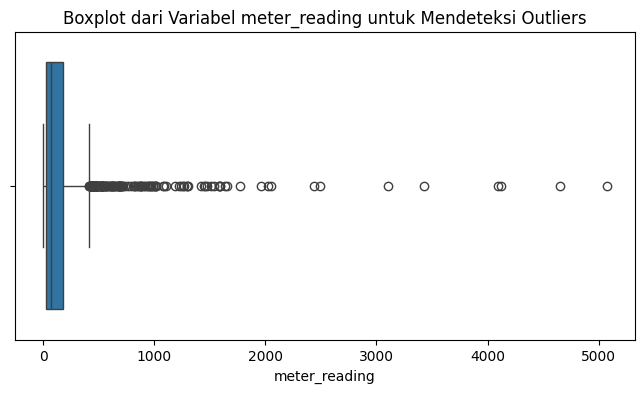

In [100]:
import pandas as pd
import os
import requests
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 4))
sns.boxplot(data=df["meter_reading"], orient="h")
plt.title('Boxplot dari Variabel meter_reading untuk Mendeteksi Outliers')
plt.show()

Outlier tidak ditangani karena model decision tree robust terhadap outlier

# **Visualisasi**

<Axes: xlabel='count', ylabel='primary_use'>

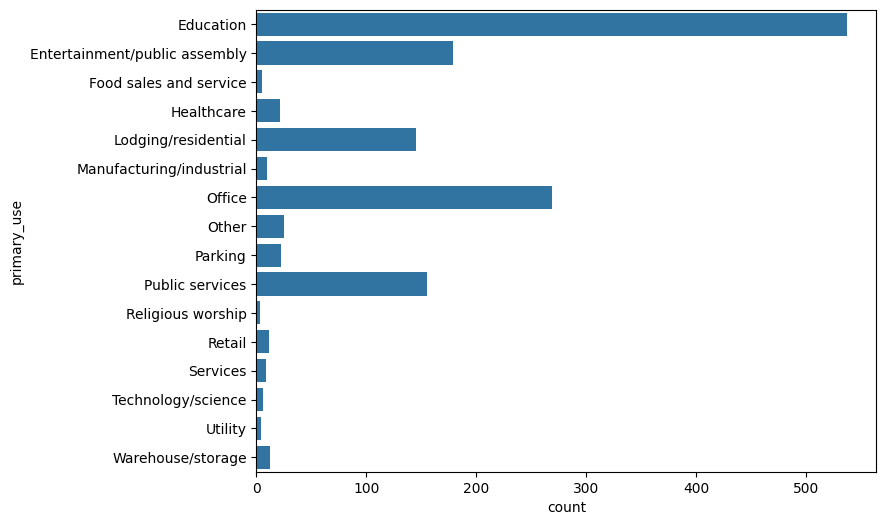

In [101]:
#Primary usage plots
#Count plot for each primary usage category
plt.figure(figsize=(8,6))
sns.countplot(y='primary_use', data=df)

Interpretasi: Dari total 1.413 data gedung, mayoritas merupakan gedung yang digunakan untuk keperluan pendidikan, dengan jumlah lebih dari 500 gedung.

<ipython-input-102-562272debe29>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='meter_reading', y='primary_use', ci=None)


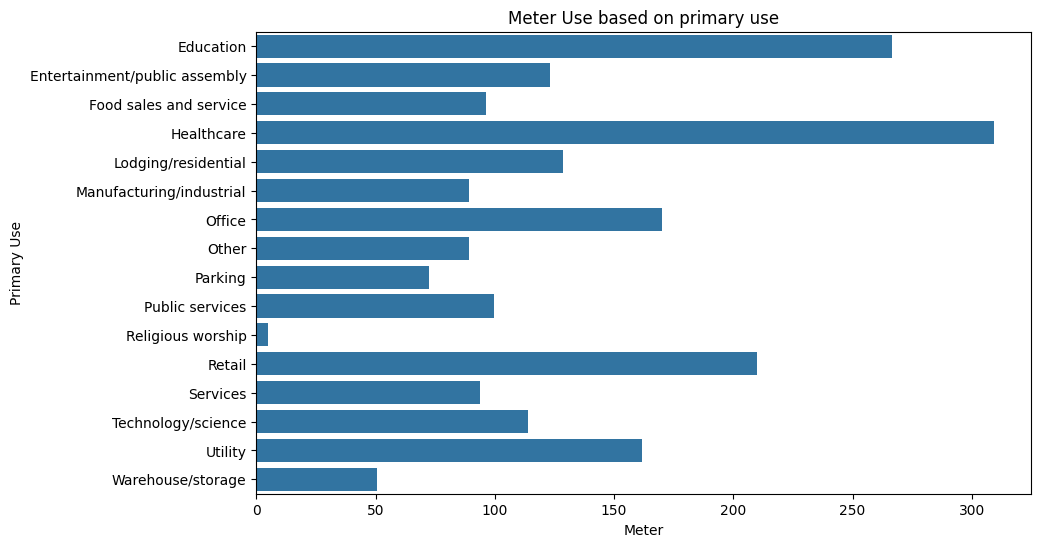

In [102]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='meter_reading', y='primary_use', ci=None)
plt.title("Meter Use based on primary use")
plt.xlabel("Meter")
plt.ylabel("Primary Use")
plt.show()

Berikut adalah beberapa kesimpulan yang bisa diperoleh dari grafik tersebut:

Variasi Penggunaan Energi Berdasarkan Jenis Penggunaan:
1.  Healthcare dan Education memiliki penggunaan energi yang paling tinggi, yang menunjukkan bahwa sektor ini kemungkinan memiliki fasilitas dengan konsumsi energi yang signifikan, mungkin karena peralatan medis di rumah sakit atau penggunaan energi untuk pencahayaan, pendingin ruangan, dan alat-alat elektronik dalam fasilitas sekolah.
2. Religius worship dan Warehouse/storage memiliki konsumsi energi rendah, tetapi karena sifat fasilitas ini yang seringkali kurang dimanfaatkan di luar jam operasional utama, ada potensi besar untuk menerapkan sistem energi pasif. Misalnya:
  * Religious worship: Optimalisasi dengan sistem pencahayaan otomatis yang hanya aktif selama aktivitas ibadah.
  * Warehouse/storage: Aktivitas manusia yang terbatas dan Kurangnya peralatan otomatisasi yang berat di fasilitas penyimpanan.
3. Kategori Technology/science menunjukkan konsumsi energi yang tidak setinggi Healthcare, meskipun umumnya melibatkan laboratorium atau alat berat. Ini mungkin mengindikasikan bahwa sektor ini telah mulai mengadopsi standar energi yang efisien seperti alat hemat energi atau penggunaan sistem otomatisasi canggih.
---

Berikut adalah beberapa rekomendasi berdasarkan insight yang diberikan:

 **1. Healthcare dan Education**
Karena sektor ini memiliki konsumsi energi tertinggi, terdapat beberapa upaya untuk efisiensi energi:
   - **Healthcare**:
     - **Audit Energi Rutin**: Identifikasi peralatan medis atau sistem HVAC (pemanas, ventilasi, dan pendingin udara) yang memakan energi berlebih.
     - **Pemakaian Energi Terjadwal**: Terapkan kebijakan pemakaian peralatan non-esensial (seperti pencahayaan atau peralatan kantor) hanya selama jam operasional.
     - **Penggunaan Teknologi Hemat Energi**: Ganti peralatan medis lama dengan versi hemat energi atau yang memiliki sertifikasi energi efisien.
   - **Education**:
     - **Optimalisasi Pencahayaan dan Pendingin Udara**: Pasang sensor gerak dan pencahayaan otomatis di ruang kelas atau fasilitas yang jarang digunakan.
     - **Kampanye Kesadaran Energi**: Libatkan siswa, guru, dan staf dalam kampanye efisiensi energi untuk mengurangi konsumsi yang tidak perlu.

 **2. Religious Worship**
   - **Pencahayaan Otomatis**:
     - Pasang sistem pencahayaan berbasis sensor gerak untuk memastikan lampu hanya menyala saat ada aktivitas di dalam gedung.
   - **Penggunaan Energi Pasif**:
     - Maksimalkan penggunaan cahaya alami melalui desain arsitektur atau instalasi skylight (atap tembus cahaya).
   - **Peningkatan Insulasi Bangunan**:
     - Terapkan material insulasi untuk menjaga suhu ruangan, sehingga mengurangi ketergantungan pada pendingin atau pemanas ruangan.

 **3. Warehouse/Storage**
   - **Efisiensi Energi untuk Operasional Rendah**:
     - Terapkan lampu LED hemat energi yang secara otomatis mati ketika area tidak aktif.
     - Gunakan peralatan otomatis yang hanya menyala saat digunakan, seperti conveyor belt yang berbasis *on-demand activation*.
   - **Peningkatan Ventilasi Pasif**:
     - Maksimalkan ventilasi alami untuk mengurangi ketergantungan pada sistem pendingin ruangan di gudang.


 **4. Technology/Science**
   - **Pemeliharaan Efisiensi Energi**:
     - Lakukan monitoring konsumsi energi secara real-time menggunakan sistem manajemen energi cerdas untuk memastikan alat hemat energi tetap optimal.
   - **Peningkatan Energi Terbarukan**:
     - Pasang panel surya atau sumber energi terbarukan lainnya untuk mengurangi ketergantungan pada energi konvensional.
   - **Efisiensi Operasional**:
     - Gunakan alat hemat energi atau peralatan dengan sertifikasi energi rendah di laboratorium.


Text(0.5, 1.0, 'Correlation Matrix')

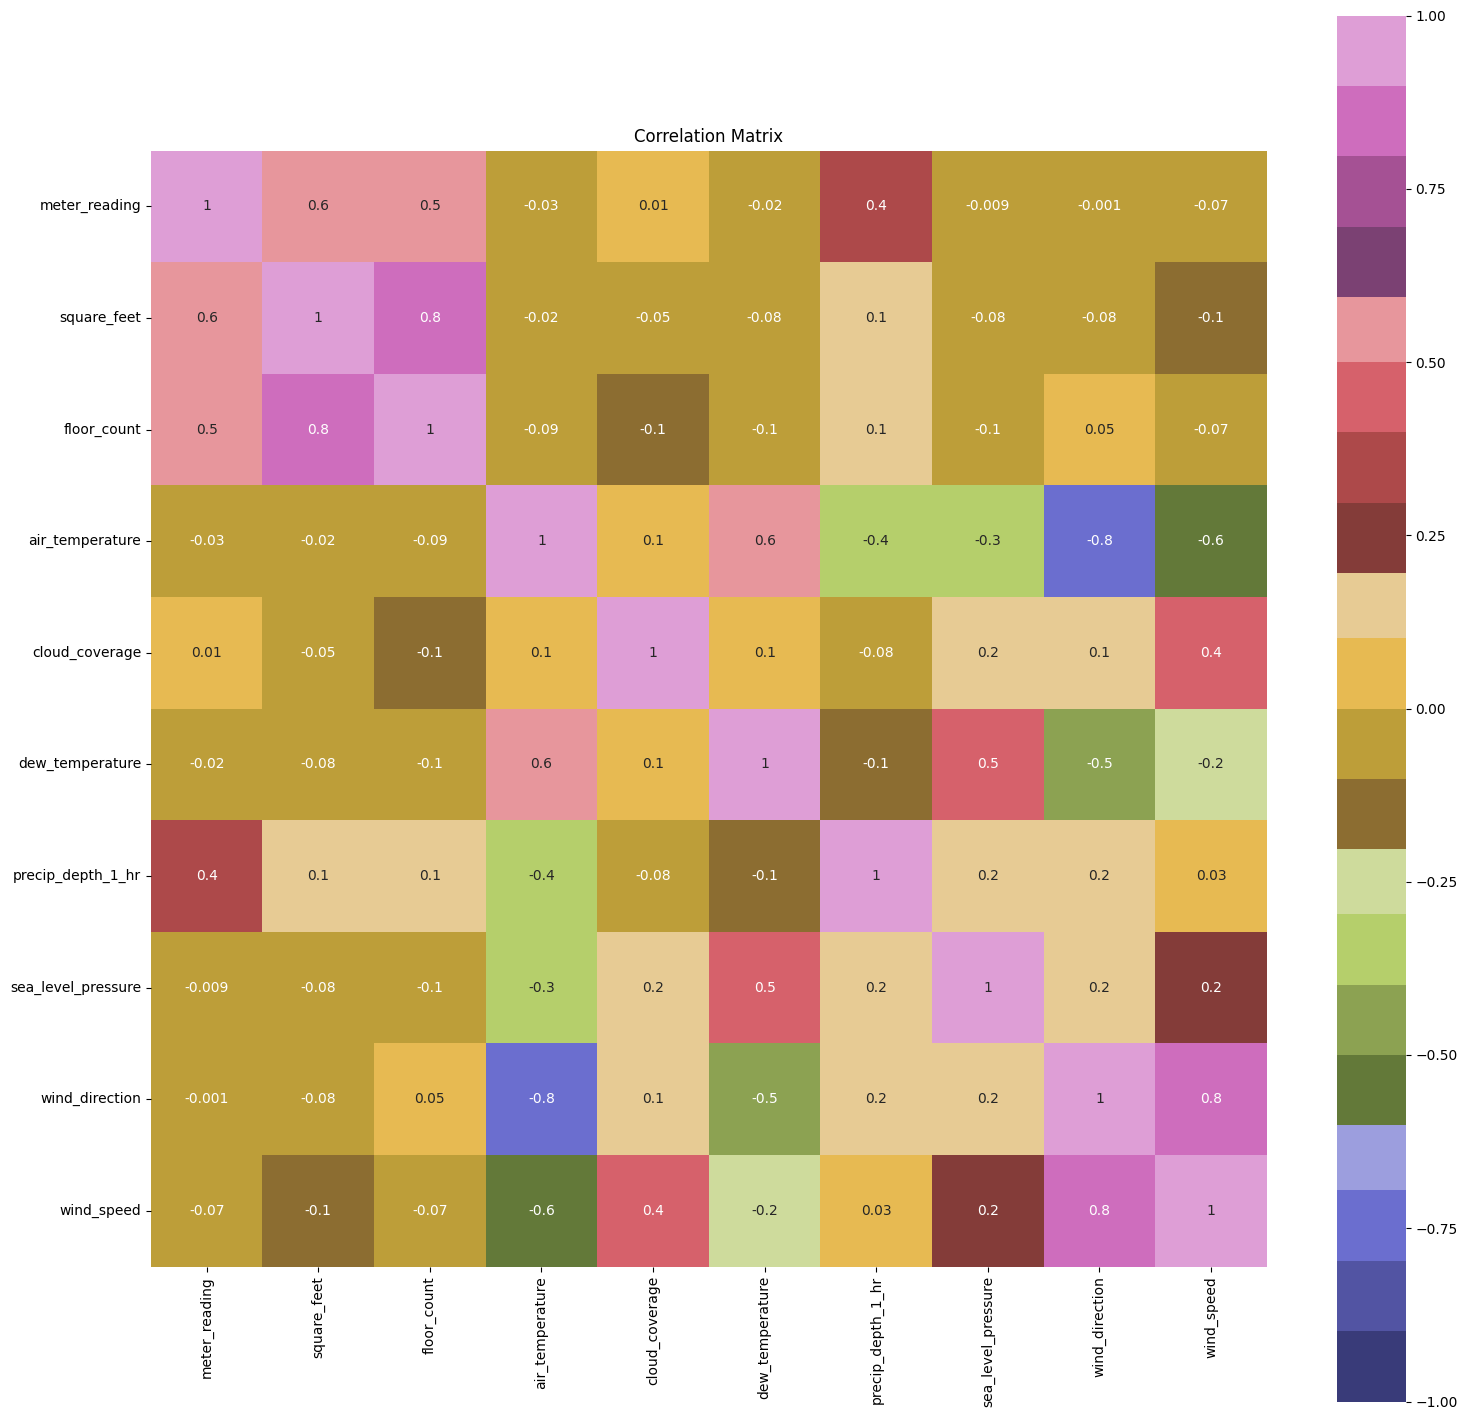

In [103]:
#Correlation Matrix
num_cols = ['meter_reading','square_feet', 'floor_count', 'air_temperature', 'cloud_coverage', 'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction', 'wind_speed']
plt.figure(figsize=(18,18))
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, square=True, cmap='tab20b')
plt.title('Correlation Matrix')

**INTERPRETASI:**

Blok berwarna ungu dan biru mengindikasikan korelasi yang semakin kuat sedangkan blok berwarna coklat cenderung mengindikasikan korelasi yang lemah. Square_feet memiliki korelasi positif kuat dengan meter_reading (0.6), menunjukkan bahwa ukuran bangunan adalah prediktor signifikan untuk konsumsi energi.
floor_count juga menunjukkan korelasi positif moderat (0.5), mengindikasikan bahwa jumlah lantai berpengaruh pada konsumsi.

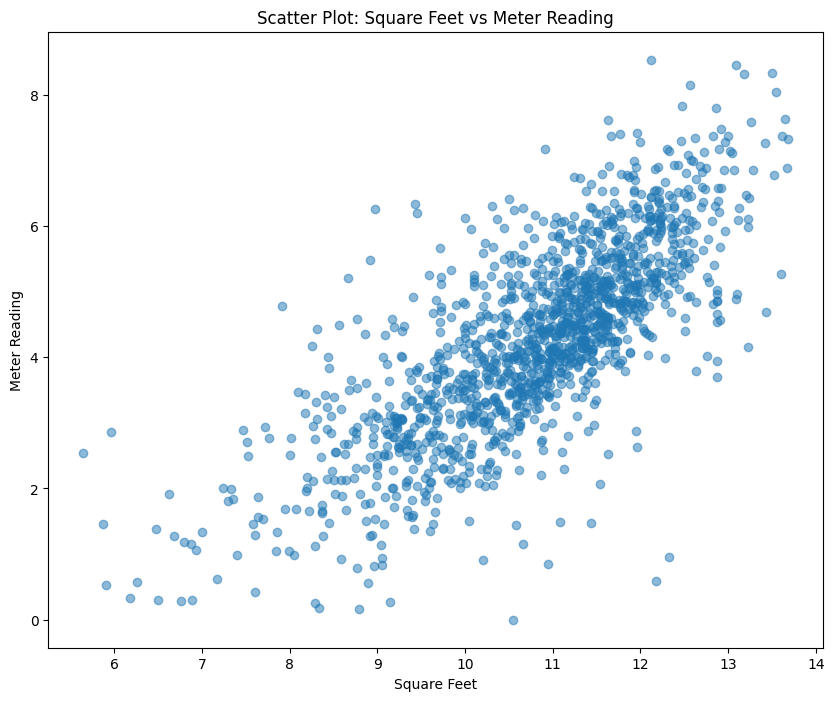

In [104]:
plt.figure(figsize=(10, 8))
plt.scatter(np.log1p(df['square_feet']), np.log1p(df['meter_reading']), alpha=0.5)
plt.xlabel('Square Feet')
plt.ylabel('Meter Reading')
plt.title('Scatter Plot: Square Feet vs Meter Reading')
plt.show()

**INTERPRETASI:**

Hubungan antara kedua variabel ini cenderung linear, artinya semakin meningkat luas area gedung, maka konsumsi energi juga cenderung meningkat secara proporsional. Hasil ini mengindikasikan bahwa luas area gedung merupakan faktor yang signifikan dalam menentukan konsumsi energi. Semakin luas suatu area, kemungkinan penggunaan energi atau sumber daya lainnya juga semakin besar, sehingga menghasilkan konsumsi energi yang lebih tinggi. Sebagian besar data terkonsentrasi di sekitar garis regresi (garis tren), menunjukkan bahwa hubungan linear tersebut cukup kuat. Namun, tetap ada beberapa titik data yang agak jauh dari garis regresi, yang mungkin merupakan outlier atau dipengaruhi oleh faktor lain, seperti efisiensi energi, jenis peralatan, perilaku pengguna, dan kondisi lingkungan juga dapat memberikan pengaruh.

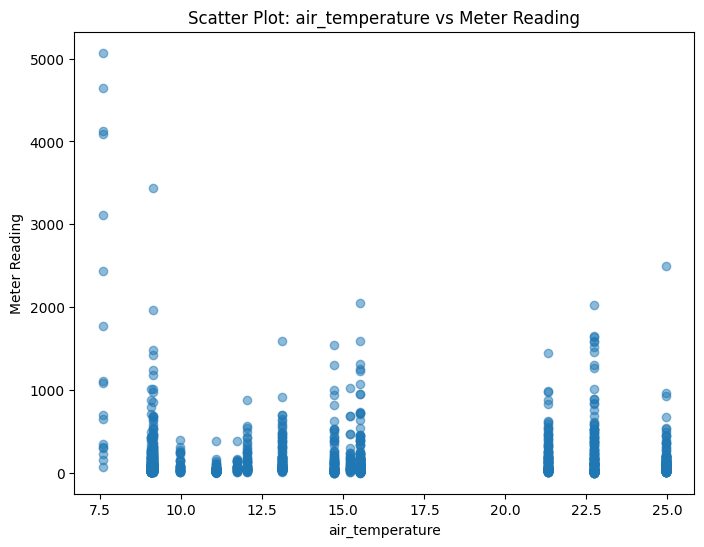

In [105]:
plt.figure(figsize=(8, 6))
plt.scatter(df['air_temperature'], df['meter_reading'], alpha = 0.5)
plt.xlabel('air_temperature')
plt.ylabel('Meter Reading')
plt.title('Scatter Plot: air_temperature vs Meter Reading')
plt.show()

 **INTERPRETASI**:

 Secara umum, tidak terlihat adanya hubungan linear yang kuat antara suhu udara dan penggunaan energi. Titik-titik data tersebar cukup acak dan tidak membentuk pola yang jelas. Untuk setiap suhu udara, terdapat variasi penggunaan energi yang sangat tinggi. Ini menunjukkan bahwa faktor lain selain suhu udara memiliki pengaruh yang lebih besar terhadap penggunaan energi.

# **Modeling**

## Decision Tree

In [106]:
df2 = df.drop(['floor_count','cloud_coverage',	'precip_depth_1_hr',	'sea_level_pressure',	'wind_direction'], axis=1)

Kami hanya menggunakan kolom primary_use, square_feet, year_built, air_temperature, dew_temperature, dan wind_speed	untuk dijadikan variabel prediktor dalam melakukan prediksi konsumsi energi karena beberapa variabel lainnya memiliki korelasi yang tinggi satu sama lain ataupun tidak memberikan dampak yang signifikan terhadap konsumsi energi sehingga model yang didapat nantinya tidak terjadi bias.

In [107]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df2 = pd.get_dummies(df2, columns=['primary_use'], drop_first=True)

# Pisahkan target variabel (y) dan fitur (X)
y = df2['meter_reading']  # Variabel respon numerik
y_log = np.log1p(y)
X = df2.drop('meter_reading', axis=1)

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42, max_depth=10)  # Anda bisa menyesuaikan max_depth
dt.fit(X_train, y_train)

# Prediksi pada data test
y_pred = dt.predict(X_test)

# Evaluasi model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
n = len(y_test)  # Jumlah observasi
p = X_test.shape[1]  # Jumlah fitur pada data
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Output hasil evaluasi
print("Decision Tree Regression - MAE:", mae)
print("Decision Tree Regression - MSE:", mse)
print("Decision Tree Regression - R²:", r2)
print("Adjusted R²:", adj_r2)


Decision Tree Regression - MAE: 0.5894213125419633
Decision Tree Regression - MSE: 0.5747434317758451
Decision Tree Regression - R²: 0.7435706033881078
Adjusted R²: 0.7239958402879634


**INTERPRETASI:**

Dengan R² sebesar 0.744, model Decision Tree cukup baik dalam menjelaskan hubungan antara fitur dan target. Namun, untuk dataset kompleks, performa ini mungkin bisa ditingkatkan lebih lanjut.

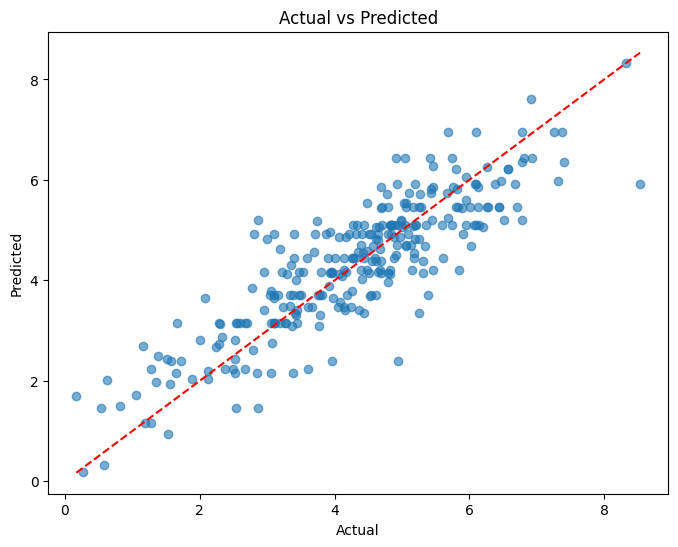

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

**INTERPRETASI:**

Plot menunjukkan bahwa prediksi model mengikuti pola yang cenderung linier, dengan sebagian besar titik mendekati garis merah putus-putus (y = x, yaitu prediksi sempurna).
Ini mengonfirmasi bahwa model Decision Tree memiliki kinerja yang cukup baik dalam memprediksi data target (meter_reading).
Dari plot ini, kita dapat menyimpulkan bahwa model bekerja dengan baik pada sebagian besar data, tetapi terdapat ruang untuk perbaikan, khususnya pada prediksi nilai-nilai tinggi.

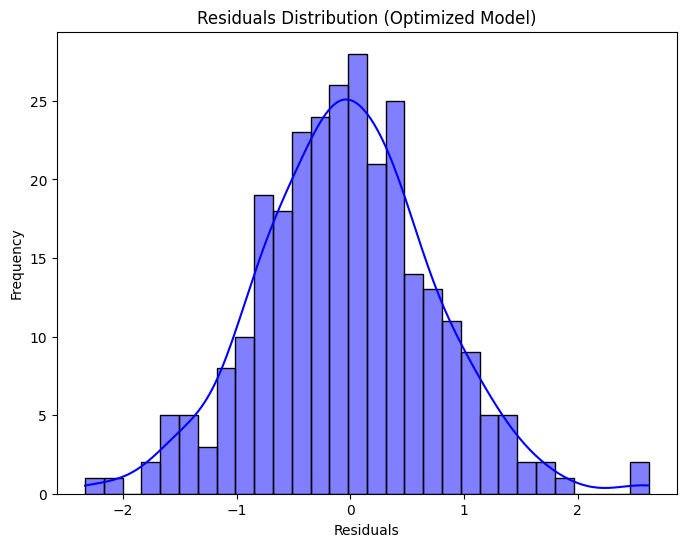

In [109]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title('Residuals Distribution (Optimized Model)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

**INTERPRETASI:**

Plot menunjukkan Distribusi residuals yang cenderung normal dan rata-rata mendekati nol mengindikasikan bahwa model decision tree ini cukup baik dalam menangkap hubungan antara variabel independen dan dependen. Model ini juga cenderung memberikan prediksi yang akurat, dengan kesalahan prediksi yang terdistribusi secara acak di sekitar nilai sebenarnya.